# Exercise 2 - Groups, Complex Numbers, and Flows

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

from scipy.integrate import odeint

## Task 2.1

Recall a **Group** is a tuple $(G, \circ)$, where $G$ is a set of elements and $\circ$ is the group law operating on elements of $G$ such that
- $ g_1, g_2 \in G \Rightarrow g_1 \circ g_2 \in G$ (closed under $\circ$)
- $\exists e \in G\ \forall g \in G: g \circ e = e \circ g = g$ (identity element)
- $\forall g \in G\ \exists! g^{-1} \in G: g \circ g^{-1} = e$ (inverses)
- $g_1, g_2, g_3 \in G: (g_1 \circ g_2) \circ g_3 = g_1 \circ (g_2 \circ g_3) = g_1 \circ g_2 \circ g_3$ (associative)

We compute the Cayley table for the dihedral group $D_3$. We first apply the operator in the row, then the operator in the column, i.e. $R_1 \circ F_1 = F_2 \neq F_1 \circ R_1 = F_3$. This leads to the following table:

<img src='cayley_dihedral3.png' width="400" >

For a group to be an Abelian Group the group law $\circ$ needs to be commutative, i.e., $\forall a,b \in G:\ a\circ b = b \circ a$. This would lead to a symmetric Cayley table and as one can clearly see the Cayley table for the dihedral group $D_3$ is not symmetric. 

From the table we can also see that each operation is represented exactly once in each row and column.

Looking only at the upper left quadrant of the table we can see that $(\{R_1, R_2, I\}, \circ)$ is an abelian subgroup of  $D_3$. 

## Task 2.2

<img src='cayley_quaternion8.png' width="400" >

We can see that $Q_8$ is not abelian as well. Like in the first task we can again find subgroups of $Q_8$ that are abelian namely $(\{1,-1,i,-i\}, \circ),\ (\{1,-1,k,-k\}, \circ),\ (\{1,-1,j,-j\}, \circ)$

## Task 2.3

In [2]:
# we have two ways to initialize complex variables in Python
# calling the complex type directly:
z1 = complex(3, +4)
z2 = complex(2, -2)

# or using syntactic sugar:
z1 = 3 + 4j
z2 = 2 - 2j

print ('computing with complex numbers')
print ('z1 + z2 = ', z1+z2)
print ('z1 * z2 = ', z1*z2)
print ('con(z1) = ', z1.conjugate())
print ('abs(z1) = ', abs(z1))
print ()




computing with complex numbers
z1 + z2 =  (5+2j)
z1 * z2 =  (14+2j)
con(z1) =  (3-4j)
abs(z1) =  5.0



In [3]:
mat1 = np.array([[+1, 0], [0, +1]])
mati = np.array([[0, -1], [+1, 0]])
print(f"i*i = \n{mati@mati}\n")
# define z1, z2 in terms of the matrices:
matz1 = 3*mat1 + 4*mati
matz2 = 2*mat1 - 2*mati

print ('computing with matrix representations of complex numbers')
print ('Z1 + Z2 = \n', matz1 + matz2, '\n')
print ('Z1 @ Z2 = \n', matz1 @ matz2, '\n')
print ('Z1.T = \n', matz1.T, '\n')
print ('sqrt(det(Z1)) = ', np.sqrt(la.det(matz1)))
print ('\n\n')
print(matz1 * matz2)

i*i = 
[[-1  0]
 [ 0 -1]]

computing with matrix representations of complex numbers
Z1 + Z2 = 
 [[ 5 -2]
 [ 2  5]] 

Z1 @ Z2 = 
 [[14 -2]
 [ 2 14]] 

Z1.T = 
 [[ 3  4]
 [-4  3]] 

sqrt(det(Z1)) =  5.0



[[ 6 -8]
 [-8  6]]


$z_1 = a + bi$

$z_2 = c + di$

$z_1 * z_2 = ac + adi + bci + dbii = (ac-db) + (ad+bc)i$

$Z_1 = a \begin{pmatrix}
  1 & 0\\ 
  0 & 1
\end{pmatrix} + b \begin{pmatrix}
  0 & -1\\ 
  1 & 0
\end{pmatrix}
= \begin{pmatrix}
  a & -b\\ 
  b & a
\end{pmatrix}$
$, Z_2 = \begin{pmatrix}
  c & -d\\ 
  d & c
\end{pmatrix}$

$Z_1 * Z_2 = \begin{pmatrix}
  ac -bd & -ad - bc\\ 
  ad + bc & ac -bd
\end{pmatrix}= \begin{pmatrix}
  ac - bd & -(ad + bc)\\ 
  ad + bc & ac -bd
\end{pmatrix}$

We see that the product of $Z_1, Z_2$ again has the structure of a complex number in matrix form



**Bonus task**

1.

In [4]:
### unit quaternions as 4 x 4 real matrices
mat1 = np.eye(4)

mati = np.array([[0, -1, 0, 0],
                 [+1, 0, 0, 0],
                 [0, 0, 0, -1],
                 [0, 0, +1, 0]])
matj = np.array([[0, 0, -1, 0],
                 [0, 0, 0, +1],
                 [+1, 0, 0, 0],
                 [0, -1, 0, 0]])
matk = np.array([[0, 0, 0, -1],
                 [0, 0, -1, 0],
                 [0, +1, 0, 0],
                 [+1, 0, 0, 0]])

print ('i @ j @ k = \n', mati @ matj @ matk)
print ()

i @ j @ k = 
 [[-1  0  0  0]
 [ 0 -1  0  0]
 [ 0  0 -1  0]
 [ 0  0  0 -1]]



2.

In [5]:
### unit quaternions as 2 x 2 complex matrices
mat1 = np.eye(2)

###
### NOTE: these matrices work and are a valid solution 
###
# mati = np.array([[+1j, 0],
#                  [0, -1j]])
# matj = np.array([[0, +1],
#                  [-1, 0]])
# matk = np.array([[0, +1j],
#                  [+1j, 0]])

###
### however, if we multiply the following matrices by i,
### we obtain the Pauli matrices sx = i*matK, sy = i*matj, sz = i*mati
### in this sense, these matrices constitute a more interesting solution
###
mati = np.array([[+1j, 0],
                 [0, -1j]])
matj = np.array([[0, -1],
                 [+1, 0]])
matk = np.array([[0, -1j],
                 [-1j, 0]])

print ('i @ j @ k = \n', mati @ matj @ matk)

i @ j @ k = 
 [[-1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


## Task 2.4

In [16]:
matX = np.loadtxt('GaussianSample3D.csv', delimiter=', ')
m, n = matX.shape
print (m, n)

C = 1/n * matX @ matX.T
print(C.shape)
vals, vecs = la.eigh(C)
print(f"eigen values:\n {vals} \neigen vecs:\n {vecs}")

_w_prime = lambda w: (np.eye(w.shape[0]) - np.outer(w,w)) @ C @ w

def sample_w0(dim):
    w = np.random.rand(dim) # samples uniformly from [0, 1)
    return w/np.linalg.norm(w)

sample_w0(3)

3 250
(3, 3)
eigen values:
 [0.73945615 1.42721672 5.09333892] 
eigen vecs:
 [[ 0.35907341 -0.48255527  0.7988784 ]
 [-0.04053779 -0.86321917 -0.50319912]
 [ 0.93242854  0.14830066 -0.32952077]]


array([0.76930055, 0.05944852, 0.63611519])

In [17]:
def deriv(w, t, C, I):
    return (I - np.outer(w, w)) @ C @ w

In [47]:
### load data matrix
matX = np.loadtxt('GaussianSample3D.csv', delimiter=', ')
m, n = matX.shape
# print (m,n)

### compute sample covariance matrix
matC = np.cov(matX)

### compute spectral decomposition and print leading eigenvector
vecL, matU = la.eigh(matC)
print (f"eigh eigvector:\t {matU[:,-1]}")

def oja_flow(matC, vecW=None):
    ### prepare ingredients for solving Oja's flow
    # identity matrix
    matI = np.eye(matC.shape[0])

    # initial unit vector w(0)
    vecW = np.ones(m) / np.sqrt(m) if vecW is None else vecW

    # time steps for ODE solver
    stps = np.linspace(0, 5, 126)

    ### use odeint to solve Oja flow
    matW = odeint(deriv, vecW, stps, (matC,matI))
    flow = matW.T
    return stps, flow
stps, flow = oja_flow(matC)
### print stable point (pint the flow converges to)
print (f"stable point:\t {flow.T[-1]}")

eigh eigvector:	 [ 0.7988784  -0.50319912 -0.32952077]
stable point:	 [-0.79887823  0.50319943  0.32952073]


We see that the Oja flow indeed yields the eigenvector (up to a factor of -1).

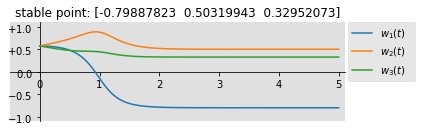

In [48]:
def plt_w_evolution(stps, flow):
    ### plot the evolution over time
    # initialize figure and axes
    fig = plt.figure()
    fig.patch.set_facecolor('w')
    axs = fig.add_subplot(211, facecolor='#e0e0e0')

    # nicer way of showing coordinate axes
    for pos in ['left','bottom']:
        axs.spines[pos].set_position('zero')
        axs.spines[pos].set_zorder(1)
    for pos in ['right','top']:
        axs.spines[pos].set_visible(False)
    axs.xaxis.set_ticks_position('bottom')
    axs.yaxis.set_ticks_position('left')
    axs.tick_params(direction='out')

    for i, wt in enumerate(flow):
        axs.plot(stps, wt, '-', label=r'$w_{%i}(t)$' % (i+1))

    leg = axs.legend(bbox_to_anchor=(1.01,0.0,0.2,1), loc="upper left",
                     mode="expand",
                     borderaxespad=0.,
                     facecolor='#e0e0e0', edgecolor='#e0e0e0',
                     fancybox=False)

    axs.set_xlim(-0.5, np.max(stps+0.1))
    axs.set_ylim(-1.1, 1.1)
    ytics = np.linspace(-1, +1, 5)
    ylabs = ['${0:{1}}$'.format(t, '+' if t else '') for t in ytics]
    axs.set_yticks(ytics)
    axs.set_title(f"stable point: {flow.T[-1]}")
    _ = axs.set_yticklabels(ylabs)



plt_w_evolution(stps, flow)

stable point:	 [-0.48255527 -0.86321917  0.14830066]
stable point:	 [ 0.35907341 -0.04053779  0.93242854]


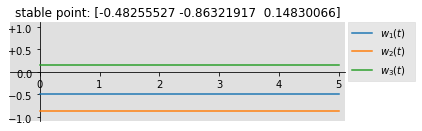

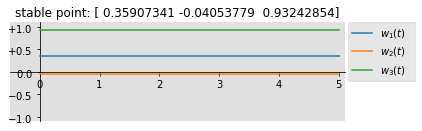

In [49]:
for i in [2, 3]:
    stps, f = oja_flow(matC, vecW=matU[:, -i])
    plt_w_evolution(stps, f)
    print (f"stable point:\t {f.T[-1]}")

We see that the other eigenvectors also are stable points, but if we apply even only a little noise:

noise: [ 1.62440251e-04 -8.81959689e-05  1.25671436e-05]
stable point:	 [ 0.79884955 -0.50325073 -0.32951191]
noise: [-1.35744766e-05 -2.24586307e-06  4.88464645e-05]
stable point:	 [-0.79887393  0.50319861  0.32953239]


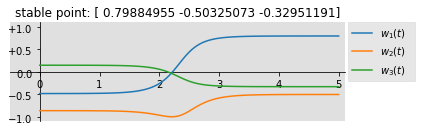

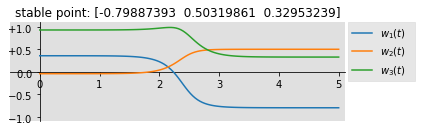

In [50]:
for i in [2, 3]:
    r = np.random.normal(loc=0, scale=0.0001, size=3)
    w = matU[:, -i] + r
    print(f"noise: {r}")
    
    stps, f = oja_flow(matC, vecW=w)
    plt_w_evolution(stps, f)
    print (f"stable point:\t {f.T[-1]}")

the result converges to the first eigenvector again.

A deeper mathematical analysis of the Oja Flow is beyond the scope of this course but if you are really interested these papers (the first citing the other two) may serve as a starting point:

```
Yan, Wei-Yong, Uwe Helmke, and John B. Moore. "Global analysis of Oja's flow for neural networks." IEEE Transactions on Neural Networks 5.5 (1994): 674-683. 
DOI: 10.1109/72.317720

Oja, Erkki. "Simplified neuron model as a principal component analyzer." Journal of mathematical biology 15.3 (1982): 267-27 
DOI: 10.1007/BF00275687

Oja, Erkki, and Juha Karhunen. "On stochastic approximation of the eigenvectors and eigenvalues of the expectation of a random matrix." Journal of mathematical analysis and applications 106.1 (1985): 69-84. 
DOI: 10.1016/0022-247X(85)90131-3
```


## Task 2.5

**Oja flow is isometric**

Prove that if

$\dot{w} = (\mathbf{I} - ww^T) Cw$

start with a unit vector $w(0) = w_0$ s.t. $||w_0||^2 = w_0^Tw_0 = 1$ then it holds that $\frac{d}{dt}||w||^2 = 0$.

$
\begin{eqnarray} 
& \frac{d}{dt}||w||^2  \\\
&=& \frac{dw}{dt}\frac{d}{dw}||w||^2 \\\ 
&=& 2w^T\frac{d}{dt}w \\\ 
&=& 2w^T (\mathbf{I} - ww^T)Cw \\\ 
&=& 2w^TCw - 2\underbrace{w^Tw}_{=1}w^TCw \\\
&=& 2w^TCw - 2w^TCw = 0
\end{eqnarray} 
$


## Task 2.6

In [25]:
def qrAlgorithm(X, tmax=10):
    C = X.copy()
    for _ in range(tmax):
        Q, R = la.qr(C)
        C = R @ Q

    return C

In [58]:
### a vector x whose entries are supposed to be sorted
vecX = np.array([4, -3, 2, 7, 12, 1])
print ('elements of vector x:', vecX)




### create a tridiagonal matrix with x on the diagonal
### and rather small entries on the two subdiagonals
n   = vecX.size
eps = 0.0001

matX = np.diag(vecX) \
       + eps * np.diag(np.ones(n-1), +1) \
       + eps * np.diag(np.ones(n-1), -1)


# print(f"X: {matX}")
# ### just for the fun of it, look at the eigenvalues of X
# vecL, matU = la.eigh(matX)
# print ('eigenvalues of matrix X:', vecL)



# use the QR algorithm to solve Toda flow which, for a
# tridiagonal matrix X, is equivalent to Brockett flow
# matY = la.logm(qrAlgorithm(la.expm(matX), tmax=5))
# print ('diagonal of matrix Y:', np.diag(matY))
# print ()


### Solution to the actual task:
for tmax in [1, 5, 10, 50]:
    matY = la.logm(qrAlgorithm(la.expm(matX), tmax=tmax))
    matY_no_logexp = qrAlgorithm(matX, tmax=tmax)
    print (f'diagonal of matrix Y @ {tmax}:{ np.diag(matY)}')
    print (f'no log(exp(X))         {tmax}:{ np.diag(matY_no_logexp)}')
    print()

elements of vector x: [ 4 -3  2  7 12  1]
diagonal of matrix Y @ 1:[ 4.         -2.99995595  2.          7.         11.99995595  1.        ]
no log(exp(X))         1:[ 4.         -3.          2.00000002  6.99999998 12.          1.        ]

diagonal of matrix Y @ 5:[ 4.00012312 11.99987688  7.          2.         -3.          1.        ]
no log(exp(X))         5:[ 4.         -3.          2.00055165  6.99944879 11.99999956  1.        ]

diagonal of matrix Y @ 10:[12.          4.00593619  6.99406381  2.         -2.99975377  0.99975376]
no log(exp(X))         10:[ 4.         -3.          6.84098249  2.16057581 11.9984417   1.        ]

diagonal of matrix Y @ 50:[12.  7.  4.  2.  1. -3.]
no log(exp(X))         50:[11.99999995  4.00010489  6.99989517 -3.          2.          1.        ]



We can see that the QR algorithm sorts the entries of the original vector x; if we do not apply the matrix exponential and logarithm the vector only gets sorted by absolute values.

